# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/traffic-signs-data/train.p'
testing_file = '../data/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

['13' 'Yield']


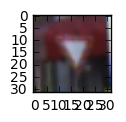

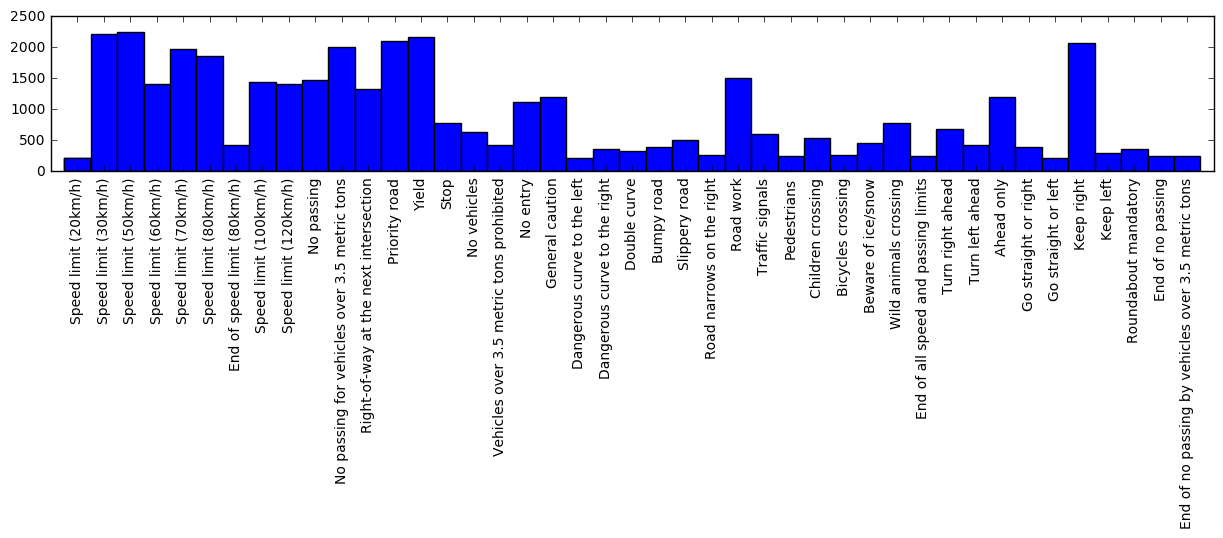

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# First, import the human readable csv file with class names
import csv
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    signnames = np.array(list(reader))

# Show random image and corresponding label
import random
index = random.randint(0,len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image,cmap='gray')
print(signnames[y_train[index]+1])

# Show distribution of class labels for the training set
plt.figure(figsize=(15,2))
bins=np.arange(n_classes+1)-0.5
_ = plt.hist(y_train,bins)
_ = plt.xticks(bins+0.5, signnames[1:,1], rotation='vertical')
_ = plt.xlim([-1, n_classes])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
n_channels = X_train.shape[3]

# Simply fit images to range [0,1] as floats
X_train = X_train.astype(float)/255.0
X_test = X_test.astype(float)/255.0
print('Successfully normalized images')

Successfully normalized images


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I simply divided by the maximum value for the uint8 type (255) and typecasted all images to floats.
More advanced methods are available such as ensuring zero mean and unit variance or ZCA whitening. But I wanted to make it as simple as possible and focus on exploring and optimizing the CNN architecture and hyperparameters.

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [6]:
# Split training set into validation set (20%) and new training set (80%)
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

n_train = X_train.shape[0]
n_validation = X_validation.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)

# Shuffle the training data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

# Augment training set using keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=5,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest',
        dim_ordering='tf')

datagen.fit(X_train) # Actually, this is only relevant if we have used any data-dependent transformations (ZCA etc.)

Number of training examples = 31367
Number of validation examples = 7842


Using TensorFlow backend.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I used sklearn's train_test_split to split the training data into a validation set (20%) and a new training set (80%).
Then I shuffled the training data, to make sure that batches will represent random parts of the training set.
Ultimately, I augmented the training set with the ImageDataGenerator from keras.
Here, I applied:
- random rotations of the images with up to 5 degrees
- random horizontal and vertical shift with up to 0.05*32~=1 pixel
- random shear transformation with up to 0.2 radians
- random zoom from 0.8 to 1.2 of the original image patches
- no vertical/horizontal flip, since the direction of e.g. a traffic arrow does matter in the classification

The ImageDataGenerator, datagen, is used later during training to provide real-time and infinite data augmentation. That is, the data augmentation is done on-the-fly.
The purpose of data augmentation is to prevent the network from overfitting the training set. By introducing random transformations to the original images in the training set, we effectively expand the training set. Hopefully, this will result in a classifier that generalizes to new unseen examples.

In [7]:
# Define network architecture

from tensorflow.contrib.layers import flatten

def mynet(x,keep_prob):    
    # Input data dimensions
    channels = int(x.get_shape()[3])
    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # conv1. Input = 32x32xchannels. Output = 30x30x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, channels, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # conv2. Input = 30x30x32. Output = 28x28x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # pool1. Input = 28x28x32. Output = 14x14x32.
    pool1 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # conv3. Input = 14x14x32. Output = 12x12x64.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(pool1, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Activation.
    conv3 = tf.nn.relu(conv3)
    
    # conv4. Input = 12x12x64. Output = 10x10x64.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 64), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(64))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    
    # Activation.
    conv4 = tf.nn.relu(conv4)

    # pool2. Input = 10x10x64. Output = 5x5x64.
    pool2 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x64. Output = 1600.
    fc0   = flatten(pool2)
    
    # fc1. Input = 5*5*64=1600. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # fc2. Input = 512. Output = 256.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(256))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # fc3. Input = 256. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(256, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    l2_loss = tf.nn.l2_loss(conv1_W)+tf.nn.l2_loss(conv2_W)+tf.nn.l2_loss(conv3_W)+tf.nn.l2_loss(conv4_W)+tf.nn.l2_loss(fc1_W)+tf.nn.l2_loss(fc2_W)+tf.nn.l2_loss(fc3_W)
    
    return (logits,l2_loss)

In [8]:
import tensorflow as tf
# Define network architecture
x = tf.placeholder(tf.float32, (None, image_shape[1], image_shape[0], n_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

keep_prob = tf.placeholder(tf.float32) # probability to keep units
logits, l2_loss = mynet(x,keep_prob)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture consists of 9 layers: 4 convolutional, 2 pooling, and 3 fully connected.
The architecture is inspired by the VGG network (see answer to question 5 for more details).
The convolutional kernels are all 3x3, making the architecture relatively simple. By stacking two 3x3 convolutional layers, an effective kernel receptive field of 5x5 is achieved - with fever parameters than a single 5x5 kernel.
All activation functions are rectified linear units (ReLU).

The first and second convolutional layers have an output depth of 32 (feature maps). After a max pooling layer, the output is 14x14x32.
The third and fourth convolutional layers increase the output depth to 64, resulting in an output after max pooling of 5x5x64.
This is also the input for the first fully connected layer (5x5x64=1600).
From here, the network is "narrow down" from 512 neurons to 256, and then 43 (number of classes).

In total, the network consists of ~1 million parameters.

Before the last fully connected layer, dropout is introduced with a keep probability specified as an input parameter (described in question 4).
In the network definition, L2 weight loss is also calculated and returned by the function. This allows for L2 weight regularization by the optimizer (described in question 4).

In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 16
L2_regularization = 0
dropout_keep_prob = 0.75
rate = 0.001
momentum = 0.9
augmentedData = True

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy+L2_regularization*l2_loss)
#optimizer = tf.train.AdamOptimizer(learning_rate = rate)
optimizer = tf.train.MomentumOptimizer(learning_rate = rate, momentum = momentum)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Count total number of parameters (from http://stackoverflow.com/questions/38160940/how-to-count-total-number-of-trainable-parameters-in-a-tensorflow-model)
total_parameters = 0
for variable in tf.trainable_variables():
    # shape is an array of tf.Dimension
    shape = variable.get_shape()
    #print(shape)
    #print(len(shape))
    variable_parametes = 1
    for dim in shape:
        #print(dim)
        variable_parametes *= dim.value
    #print(variable_parametes)
    total_parameters += variable_parametes
print("Total number of parameters =",total_parameters)

Total number of parameters = 1027659


In [10]:
# Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    if augmentedData:
        n_batches = 0
        for batch_x, batch_y in datagen.flow(X_train, y_train, batch_size=BATCH_SIZE):
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout_keep_prob})
            n_batches += 1
            if (n_batches % int(num_examples/BATCH_SIZE)==0):
                epoch = int(n_batches/(num_examples/BATCH_SIZE)+1)
                validation_accuracy = evaluate(X_validation, y_validation)
                print("EPOCH {} ...".format(epoch))
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print()
                if epoch == EPOCHS:
                    break
    else:
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            steps = np.ceil(num_examples/BATCH_SIZE)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout_keep_prob})
            validation_accuracy = evaluate(X_validation, y_validation)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
    saver.save(sess, 'mymodel')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.796

EPOCH 2 ...
Validation Accuracy = 0.928

EPOCH 3 ...
Validation Accuracy = 0.980

EPOCH 4 ...
Validation Accuracy = 0.985

EPOCH 5 ...
Validation Accuracy = 0.988

EPOCH 6 ...
Validation Accuracy = 0.991

EPOCH 7 ...
Validation Accuracy = 0.993

EPOCH 8 ...
Validation Accuracy = 0.993

EPOCH 9 ...
Validation Accuracy = 0.994

EPOCH 10 ...
Validation Accuracy = 0.996

EPOCH 11 ...
Validation Accuracy = 0.995

EPOCH 12 ...
Validation Accuracy = 0.996

EPOCH 13 ...
Validation Accuracy = 0.998

EPOCH 14 ...
Validation Accuracy = 0.998

EPOCH 15 ...
Validation Accuracy = 0.997

EPOCH 16 ...
Validation Accuracy = 0.996

EPOCH 17 ...
Validation Accuracy = 0.997

EPOCH 18 ...
Validation Accuracy = 0.998

EPOCH 19 ...
Validation Accuracy = 0.998

EPOCH 20 ...
Validation Accuracy = 0.998

EPOCH 21 ...
Validation Accuracy = 0.998

EPOCH 22 ...
Validation Accuracy = 0.998

EPOCH 23 ...
Validation Accuracy = 0.998

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
As optimizer, I used the tf.train.MomentumOptimizer with a momentum of 0.9. This is the same setting as the VGG CNN network that won the imagenet localization challenge in 2014. The performance resembles the performance with the AdamOptimizer, but I wanted to explore momentum, so ended up with this instead.

For learning rate, I used a value of 0.001 which gave relatively fast convergence without resulting in big jumps.

For batch size, I used 16. A higher batch size gave slower convergence, whereas a lower validation accuracy with  jumps.

I compared the performance with and without data augmentation, and got an increase in accuracy of ~0.6% with data augmentation. Without data augmentation, the network converged a bit faster, since the entire training set was run through for each epoch. With data augmentation (generated in real-time as described above) the training set is sampled stochastically and random permutations are applied to each image. With this method, the "epoch" concept does not really apply, since there is no guarantee that all images in the original dataset have been sampled within an epoch (most likely, they are not).
Also, the training time is a bit slower with data augmentation, as the training examples are generated on-the-fly.
For both methods, I trained the network for 30 epochs, ensuring that they converged.

I used a single dropout layer after the second-last fully connected layer with a "keep probability" of 0.75 during training.
In order to get dropout to work, I had to decrease the variance of the weight initialization from 1 to 0.1.

I implemented L2 weight regularization, but ended up not using it. My experience was that dropout combined with on-the-fly data augmentation provided sufficient "regularization" such that the network did not overfit to the training data.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

As a starting point, I used the architecture of the VGG network that won the imagenet localization challenge in 2014. This has a relatively simple architecture, in that it only uses 3x3 convolutional kernels. Since the VGG network is designed for the imagenet challenge, it is designed to operate on images with ~228x228 pixels. The traffic signs, however, are only 32x32 pixels, and I have therefore only included the first 6 layers, resulting in a feature map of 5*5*64 before the fully connected layers. The original VGG network uses more channels for the intermediate feature maps, but due to long compution times, I only used half the depths.

For batch size, learning rate, data augmentation, l2 weight regularization, and dropout, I found the values by trial and error. Here, I isolated one variable at a time and ran the optimizer with different values.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(9, 32, 32, 3) (9,)


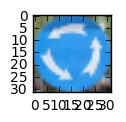

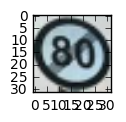

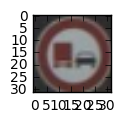

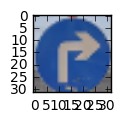

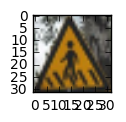

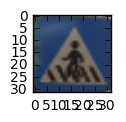

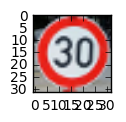

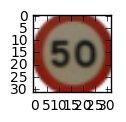

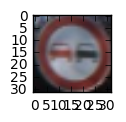

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import glob
import string

filenames = glob.glob("traffic_signs_web/*.png")

X_test_new = np.empty([len(filenames),32,32,3])
X_test_new = X_test_new.astype(float)/255.0 # Normalize
y_test_new = np.empty(len(filenames),dtype='int')

for index,path in enumerate(filenames):
    file = path.split("/")[1]
    label = int(file.split("_")[0])
    img=mpimg.imread(path)
    X_test_new[index] = img
    y_test_new[index] = label
    plt.figure(figsize=(1,1))
    plt.imshow(img)

print(X_test_new.shape,y_test_new.shape)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I have found 8 example traffic sign images on google by searching for "german traffic signs". I have then cropped out the signs and rescaled to 32x32 pixels. Finally, I have manually labeled these as good as I could from the signnames.csv, and named the files labelId_x.png.
The examples should be relatively easy to classify, I think. However, two of them show quite different version of a pedestrian crossing the road. Those two might be tricky. 

Original test set accuracy = 0.980
New images test set accuracy = 0.778


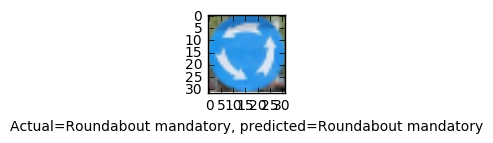

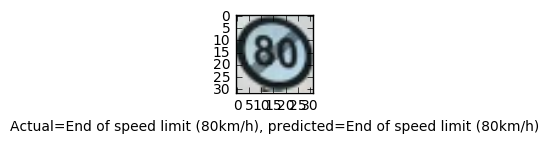

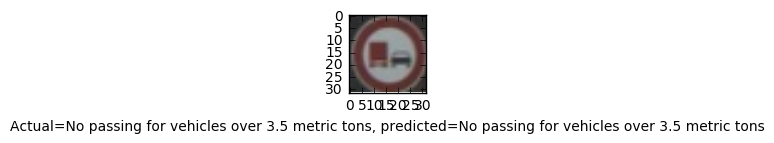

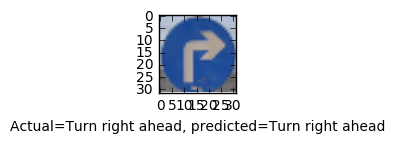

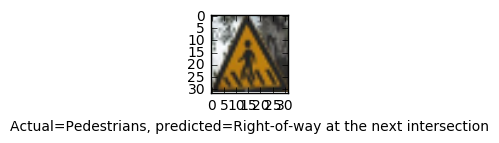

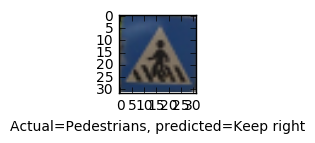

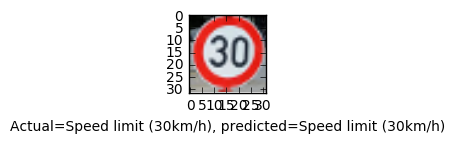

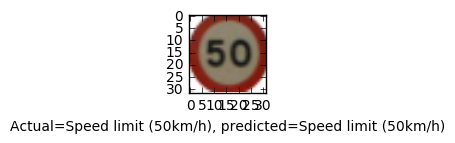

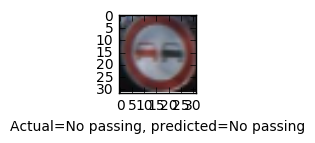

In [12]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# Test the model
prediction_operation = tf.argmax(logits, 1)

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Original test set accuracy = {:.3f}".format(test_accuracy))
    test_new_accuracy = evaluate(X_test_new,y_test_new)
    print("New images test set accuracy = {:.3f}".format(test_new_accuracy))

    prediction = sess.run(prediction_operation, feed_dict={x: X_test_new, y: y_test_new, keep_prob: 1.0})

for index,(img,label) in enumerate(zip(X_test_new,y_test_new)):
    plt.figure(figsize=(1,1))
    plt.imshow(img)
    #"Actual=",label,", predicted=",prediction[index]
    #print()
    plt.xlabel("Actual=%s, predicted=%s" % (signnames[label+1,1],signnames[prediction[index]+1,1]))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
On the original test set (from the database), I got 97.8% accuracy, which is quite good. However, not as good as the 99.8% that I got on the validation set.

On the new 8 images, I got an accuracy of 77.8%, with 2 errors. These are the two signs of pedestrians as I expected.

In [13]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

#print(prediction!=y_test_new)

softmax_operation = tf.nn.softmax(logits)

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #tf.nn.top_k(logits, k=1)
    softmax_probs = sess.run(softmax_operation,feed_dict={x: X_test_new, keep_prob: 1.0}).round(3)
    # Pick out the incorrectly classified images
    for i in range(softmax_probs.shape[0]):
        values,indices = sess.run(tf.nn.top_k(softmax_probs[i], k=5))
        print("Actual=",y_test_new[i],", predicted=",indices,values)

Actual= 40 , predicted= [40  0  1  2  3] [ 1.  0.  0.  0.  0.]
Actual= 6 , predicted= [6 0 1 2 3] [ 1.  0.  0.  0.  0.]
Actual= 10 , predicted= [10  0  1  2  3] [ 1.  0.  0.  0.  0.]
Actual= 33 , predicted= [33  0  1  2  3] [ 1.  0.  0.  0.  0.]
Actual= 27 , predicted= [11 25 29 36  3] [ 0.59600002  0.28099999  0.073       0.015       0.008     ]
Actual= 27 , predicted= [38 34 20 36 11] [ 0.46399999  0.34999999  0.105       0.037       0.028     ]
Actual= 1 , predicted= [1 0 2 3 4] [ 1.  0.  0.  0.  0.]
Actual= 2 , predicted= [2 5 3 0 1] [ 0.98900002  0.007       0.004       0.          0.        ]
Actual= 9 , predicted= [9 0 1 2 3] [ 1.  0.  0.  0.  0.]


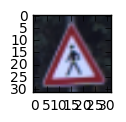

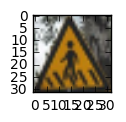

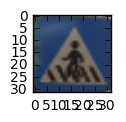

In [16]:
# Visualize example of "Pedestrian" from dataset
pedestrian_inds = [i for i,res in enumerate(y_train==27) if res]
plt.figure(figsize=(1,1))
plt.imshow(X_train[pedestrian_inds[0]])

# Visualize the two incorrectly classified "pedestrians"
inds = [i for i,res in enumerate(prediction!=y_test_new) if res] # Only return incorrectly classified
plt.figure(figsize=(1,1))
plt.imshow(X_test_new[inds[0]])
plt.figure(figsize=(1,1))
plt.imshow(X_test_new[inds[1]])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

As is seen from the output above, all the correct predictions are very certain.
However, none of the 2 incorrectly classified images have the correct label within the top 5 predictions.
At first, I was very confused about this. But after visualizing the training images from the German Traffic Sign dataset with label 27 (Pedestrians), I could see that there is a difference between "Pedestrians" and "Pedestrian crossing". The latter category is not represented in the dataset, and the network is therefore not able to classify it. Both sign types include a walking pedestrian, but differ in color and "zebra crossing stripes".

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.